In [9]:
from keras.models import Model
from keras.layers import Input, SimpleRNN, Dense, concatenate

# Define the input
inputA = Input(shape=(4, 5))  # Shape should match (timesteps, features)

# First branch
x1 = SimpleRNN(3, activation="tanh", return_sequences=True)(inputA)  # Outputs 3D
x3 = SimpleRNN(3, activation="tanh")(x1)  # Outputs 2D (batch_size, units)

# Second branch
x2 = SimpleRNN(3, activation="tanh", return_sequences=True)(inputA)  # Outputs 3D
x4 = SimpleRNN(3, activation="tanh")(x2)  # Outputs 2D (batch_size, units)

# Combine the outputs
combined = concatenate([x3, x4])

# Final dense layer
output = Dense(1, activation="sigmoid")(combined)

# Define the model
model = Model(inputs=inputA, outputs=output)

# Print the summary
model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 4, 5)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_3 (SimpleRNN)  │ (None, 4, 3)           │             27 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_5 (SimpleRNN)  │ (None, 4, 3)           │             27 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_4 (SimpleRNN)  │ (None, 3)              │             21 │ simple_rnn_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_6 (SimpleRNN)  │ (None, 3)              │             21 │ simple_rnn_5[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 6)              │              0 │ simple_rnn_4[0][0],    │
│                           │                        │                │ simple_rnn_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │              7 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
print(model.get_weights()[0])

[[ 0.18471247 -0.3102979  -0.3683203 ]
 [-0.71455544 -0.5407406   0.42474347]
 [ 0.6896028   0.37104517 -0.4842996 ]
 [-0.700691   -0.21671695  0.22595805]
 [-0.56938696 -0.7404988  -0.03503042]]


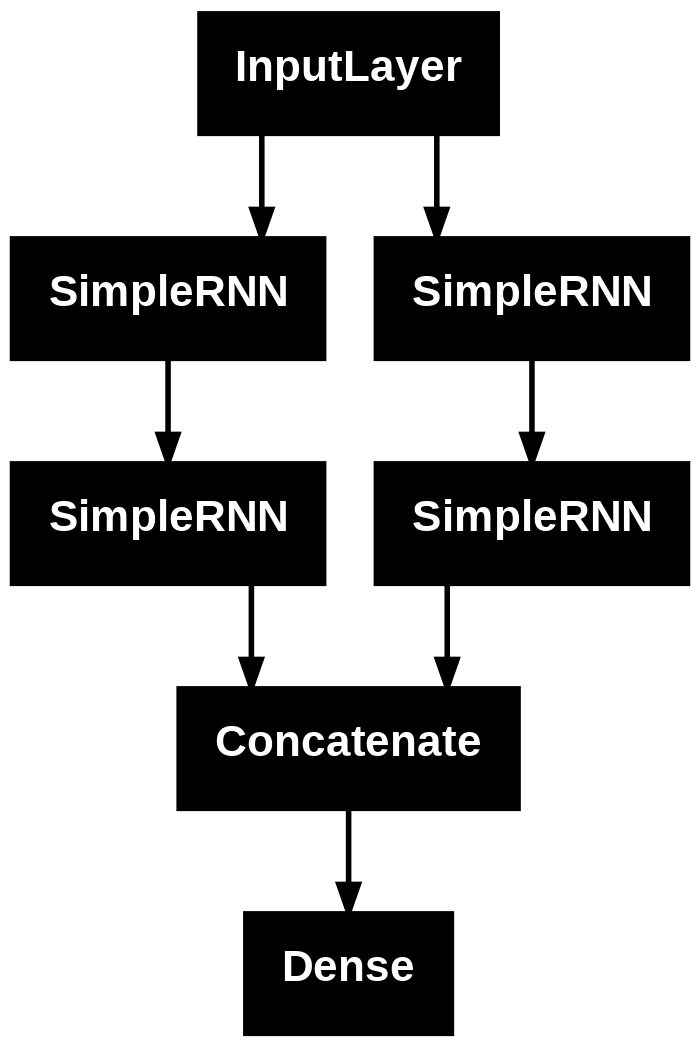

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model)